In [2]:
import pandas as pd
import numpy as np
import os

In [3]:
path = r'C:\Users\alber\Instacart Basket Analysis'
df_ords_prods_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'order_products_merged'))

In [6]:
df_ords_prods_merged.shape

(32404859, 16)

In [7]:
# Smaller subset
df = df_ords_prods_merged[:1000000]

In [9]:
# Sorting Price Ranges
def price_label(row):
    if row['prices'] <= 5:
        return 'Low-range product'
    elif (row['prices']>5) and (row['prices']<=15):
        return 'Mid-range product'
    elif row['prices'] >= 15:
        return 'High range product'
    else:
        return 'Not enough data'

In [10]:
# Sorting prices by defined function
df['price_range'] = df.apply(price_label, axis=1)

C:\Users\alber\AppData\Local\Temp\ipykernel_7324\654420195.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_range'] = df.apply(price_label, axis=1)


In [11]:
df.head()

,order_id,user_id,order_number,order_days_of_week,order_hour_of_day,days_from_previous_order,orer_hour_of_day,product_id,add_to_cart_order,reordered,Unnamed: 0,product_name,aisle_id,department_id,prices,_merge,price_range
0,2539329,1,1,2,8,NaN,8,196,1,0,195,Soda,77,7,9.0,both,Mid-range product
1,2398795,1,2,3,7,15.0,7,196,1,1,195,Soda,77,7,9.0,both,Mid-range product
2,473747,1,3,3,12,21.0,12,196,1,1,195,Soda,77,7,9.0,both,Mid-range product
3,2254736,1,4,4,7,29.0,7,196,1,1,195,Soda,77,7,9.0,both,Mid-range product
4,431534,1,5,4,15,28.0,15,196,1,1,195,Soda,77,7,9.0,both,Mid-range product


In [12]:
df['price_range'].value_counts()

Mid-range product    756450
Low-range product    243550
Name: price_range, dtype: int64

## sort prices using .loc

In [21]:
df_ords_prods_merged.loc[df_ords_prods_merged['prices'] > 15, 'price_range_loc'] = 'High-range product'

In [31]:
df_ords_prods_merged.loc[(df_ords_prods_merged['prices'] <= 15) & (df_ords_prods_merged['prices'] > 5), 'price_range_loc'] = 'Mid-range product'

In [32]:
df_ords_prods_merged.loc[df_ords_prods_merged['prices'] <= 5, 'price_range_loc'] = 'Low-range product'

In [33]:
# Counting price ranges
df_ords_prods_merged['price_range_loc'].value_counts()

Mid-range product     21860860
Low-range product     10126321
High-range product      417678
Name: price_range_loc, dtype: int64

In [41]:
# determine the busiest days for ordering
df_ords_prods_merged['order_days_of_week'].value_counts()

0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: order_days_of_week, dtype: int64

## Defining new variable for loop

In [43]:
# define new variable 'businest day' for loop
result = []

for value in df_ords_prods_merged['order_days_of_week']:
    if value == 0:
        result.append("Busiest day")
    elif value == 4:
        result.append("Least busy")
    else:
        result.append("Regularly busy")

In [44]:
len(result)

32404859

In [45]:
df_ords_prods_merged['busiest_day'] = result
df_ords_prods_merged['busiest_day'].value_counts()

Regularly busy    22416875
Busiest day        6204182
Least busy         3783802
Name: busiest_day, dtype: int64

# Task

In [47]:
# Creating variable "Busiest days"
result2 = []

for value in df_ords_prods_merged['order_days_of_week']:
    if value in [0,1]:
        result2.append("Busiest days")
    elif value in [3,4]:
        result2.append("Slowest days")
    else:
        result2.append("Regularly busy")

In [48]:
len(result2)

32404859

In [50]:
df_ords_prods_merged['busiest_days'] = result2
df_ords_prods_merged['busiest_days'].value_counts()

Regularly busy    12916111
Busiest days      11864412
Slowest days       7624336
Name: busiest_days, dtype: int64

In [51]:
6204182 + 5660230

11864412

In [52]:
3840534 + 3783802

7624336

In [54]:
# Determine busiest hour of the day
df_time = df_ords_prods_merged['orer_hour_of_day'].value_counts()
df_time

10    2761760
11    2736140
14    2689136
15    2662144
13    2660954
12    2618532
16    2535202
9     2454203
17    2087654
8     1718118
18    1636502
19    1258305
20     976156
7      891054
21     795637
22     634225
23     402316
6      290493
0      218769
1      115700
5       87961
2       69375
4       53242
3       51281
Name: orer_hour_of_day, dtype: int64

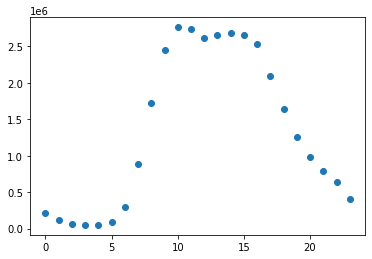

In [55]:
time = list(df_time.index)
frequency = list(df_time)
import matplotlib.pyplot as plt
plt.plot(time, frequency, 'o')

### Since frequency is y axis, 'Most Orders' would be 9 to 16, 'Fewest Orders' would be 0 to 6 and 'Average Orders' as everything else.

In [60]:
# defining "busiest_period_of_day" variable
result3 = []

for value in df_ords_prods_merged['orer_hour_of_day']:
    if value >= 9 and value <= 16:
        result3.append("Most orders")
    elif value <= 6:
        result3.append("Fewest orders")
    else:
        result3.append("Average orders")

In [61]:
df_ords_prods_merged['busiest_period_of_day'] = result3
df_ords_prods_merged['busiest_period_of_day'].value_counts()

Most orders       21118071
Average orders    10399967
Fewest orders       886821
Name: busiest_period_of_day, dtype: int64

In [62]:
df_ords_prods_merged.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged_variables.pkl'))